In [ ]:
#Lasso regression 
import numpy as np

class ADMM_LASSO:
    def __init__(self, X, y, lambda_, rho=1.0, num_iterations=1000):

        self.X = X
        self.y = y
        self.lambda_ = lambda_
        self.rho = rho
        self.num_iterations = num_iterations

        self.m, self.n = X.shape

        # Initialize variables
        # Coefficients
        self.w = np.zeros(self.n)   
        # Auxiliary variable
        self.z = np.zeros(self.n) 
        # Dual variable  
        self.u = np.zeros(self.n)   

    def solve(self):
        for _ in range(self.num_iterations):
            # Update w
            self.w = self._w_update()

            # Update z
            self.z = self._z_update()

            # Update u 
            self.u += self.X.T @ (self.X @ self.w - self.y)  

        return self.w


    def _w_update(self):
        A = self.X.T @ self.X + self.rho * np.eye(self.n)
        b = self.X.T @ self.y + self.rho * (self.z - self.u)
        return np.linalg.solve(A, b)

    def _z_update(self):
        return self._soft_threshold(self.w + self.u, self.lambda_ / self.rho)

    def _soft_threshold(self, x, alpha):
        """Soft thresholding operator."""
        return np.sign(x) * np.maximum(np.abs(x) - alpha, 0)


Optimal coefficients: [ 1.50181064e+00 -2.00076667e+00 -3.25436587e-03  2.89639637e-02
 -1.43201302e-02  2.99140687e+00  1.11162333e-02  3.95167431e-04
  8.23844474e-03 -1.02045035e-02]


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Mean Squared Error: 35.00
LASSO Coefficients:
crim: -0.13
rm: 5.97
age: -0.05
dis: -0.41
tax: -0.01


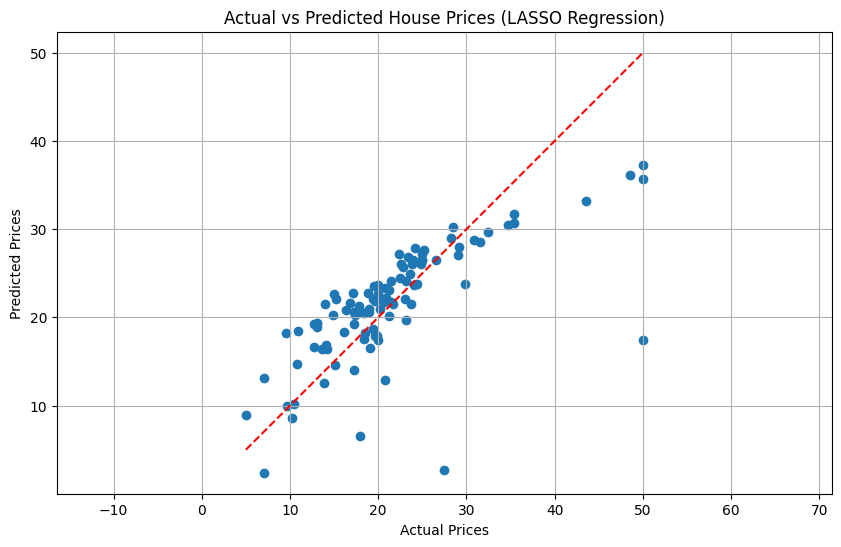

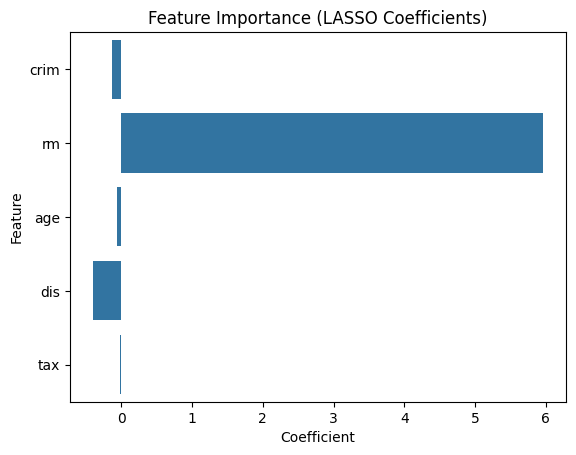

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"  # Make sure this is the correct URL
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Feature selection: Use only relevant features for the model
# For demonstration, we'll select a few features using the correct column names
features = ['crim', 'rm', 'age', 'dis', 'tax']  # Use lowercase feature names
X = df[features]
y = df['medv']  # Median value of owner-occupied homes in $1000s

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LASSO Regression
lambda_ = 1.0  # Regularization parameter
lasso = Lasso(alpha=lambda_)
lasso.fit(X_train, y_train)

# Make predictions
y_pred = lasso.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Coefficients
print("LASSO Coefficients:")
for feature, coef in zip(features, lasso.coef_):
    print(f"{feature}: {coef:.2f}")

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices (LASSO Regression)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of equality
plt.axis('equal')
plt.grid()
plt.show()

# Visualizing feature importance
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': lasso.coef_})
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (LASSO Coefficients)')
plt.show()
